In [ ]:
#Importing the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

Saving processed.cleveland.data to processed.cleveland.data


In [ ]:
df = pd.read_csv(file_name,header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df.columns = ['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
restbp,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.dtypes

,0
age,float64
sex,float64
cp,float64
restbp,float64
chol,float64
fbs,float64
restecg,float64
thalach,float64
exang,float64
oldpeak,float64


In [ ]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [ ]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [ ]:
len(df.loc[(df['ca']=='?')|(df['thal']=='?')])

6

In [ ]:
df.loc[(df['ca']=='?')|(df['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [ ]:
df_no_missing = df.loc[(df['ca']!='?')&(df['thal']!='?')]


In [ ]:
len(df_no_missing)

297

In [ ]:
X = df_no_missing.drop('hd',axis=1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [ ]:
y = df_no_missing['hd'].copy()
y.head()

,hd
0,0
1,2
2,1
3,0
4,0


In [ ]:
pd.get_dummies(X,columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,True,False,False,False
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,False,False,False,True
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,False,False,True,False
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,False,True,False,False


In [ ]:
X_encoded = pd.get_dummies(X,columns=['cp','restecg','slope','thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,True,...,False,False,False,True,False,False,True,False,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,...,True,False,False,True,False,True,False,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,False,...,True,False,False,True,False,True,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,False,...,False,True,False,False,False,False,True,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,False,...,False,False,False,True,True,False,False,True,False,False


In [ ]:
y.unique()

array([0, 2, 1, 3, 4])

In [ ]:
y_not_zero_index = y > 0
y[y_not_zero_index] = 1
y.unique()

array([0, 1])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,random_state=42)

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.5732758620689655, 0.9583333333333334, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.33189655172413796, 0.875, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(0.4525862068965517, 0.9166666666666667, 'True  '),
 Text(0.2025862068965517, 0.7916666666666666, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80.0, 13.0]\nclass = No HD'),
 Text(0.14655172413793102, 0.7083333333333334, 'age <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(0.08620689655172414, 0.625, 'chol <= 311.5\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = No HD'),
 Text(0.05172413793103448, 0.5416666666666666, 'restbp <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = No HD'),
 Text(0.034482758620689655, 0.4583333333333333, 'sex <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No HD'),
 Text(0.017241379310344827, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No HD'

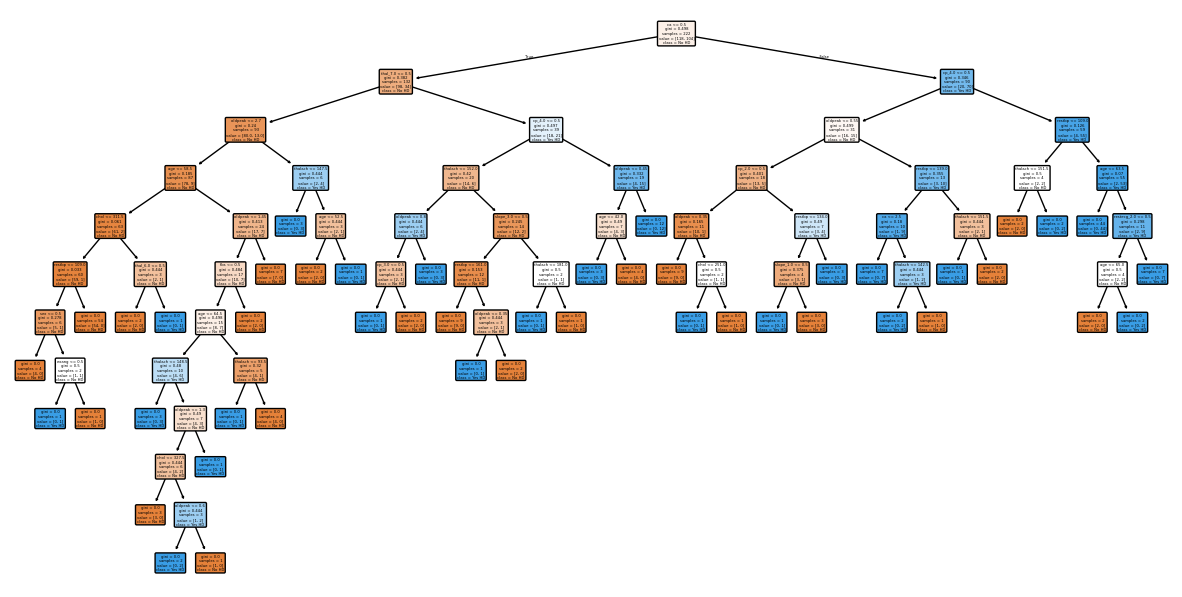

In [ ]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt,filled=True,rounded=True,class_names=['No HD','Yes HD'],feature_names=X_encoded.columns)

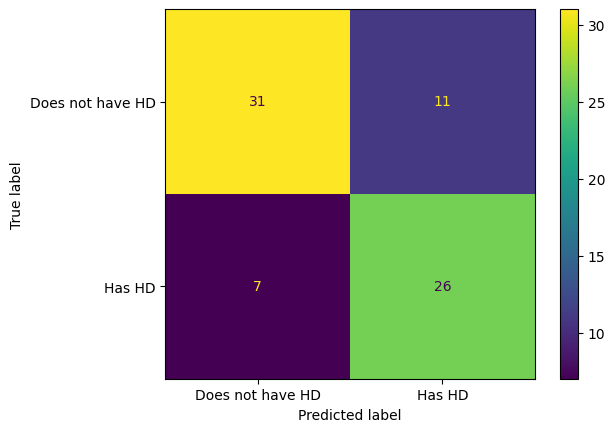

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_dt,X_test,y_test,display_labels=['Does not have HD','Has HD'])

In [ ]:
path = clf_dt.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

ccp_alphas = ccp_alphas[:-1]
clf_dts = []

for ccp_alpha in ccp_alphas:
  clf_dt = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
  clf_dt.fit(X_train,y_train)
  clf_dts.append(clf_dt)


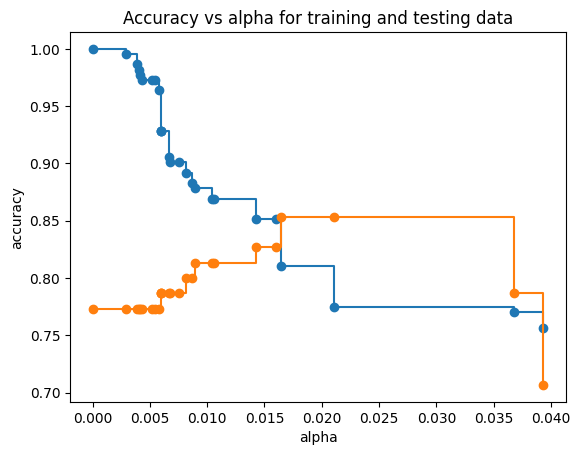

In [ ]:
train_scores = [clf_dt.score(X_train,y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test,y_test) for clf_dt in clf_dts]

fig,ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing data")
ax.plot(ccp_alphas,train_scores,marker='o',label='Train',drawstyle = "steps-post")
ax.plot(ccp_alphas,test_scores,marker='o',label='Test',drawstyle = "steps-post")

<Axes: xlabel='Tree'>

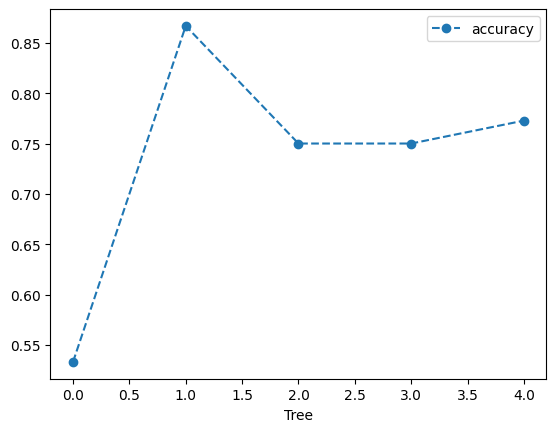

In [ ]:
clf_dt = DecisionTreeClassifier(random_state = 42,ccp_alpha=0.016)
scores = cross_val_score(clf_dt,X_train,y_train,cv=5)

df = pd.DataFrame({'Tree':range(5),'accuracy':scores})

df.plot(x='Tree',y='accuracy',marker='o',linestyle='--')

<Axes: xlabel='alpha'>

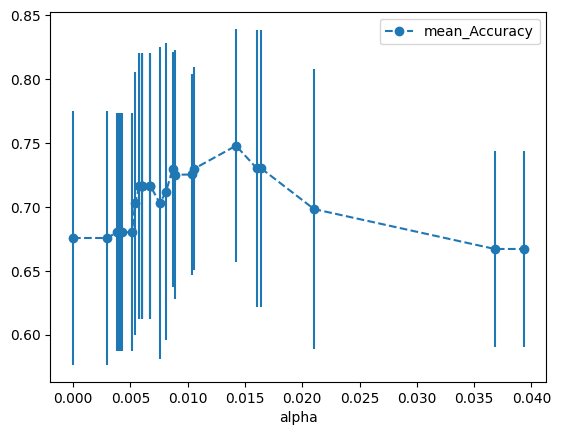

In [ ]:
#Create an array to store the results of each fold during cross validation
alpha_loop_values = []

#For each candidate value for alpha,we will run 5 fold cross validation
#Then we will store the mean and SD of the scores (the accuracy) for each call
#To cross_val_score in alpha_loop_values...

for ccp_alpha in ccp_alphas:
  clf_dt = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
  scores = cross_val_score(clf_dt,X_train,y_train,cv=5)
  alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])

#Now we can draw the graphs of Mean and SD of the scores for each candidate of alpha
alpha_results = pd.DataFrame(alpha_loop_values,columns=['alpha','mean_Accuracy','std'])

alpha_results.plot(x='alpha',y='mean_Accuracy',yerr='std',marker='o',linestyle='--')

In [ ]:
alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha']<0.015)]

,alpha,mean_Accuracy,std
20,0.014225,0.747778,0.091395


In [ ]:
ideal_alpha_value = alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha']<0.015)]['alpha']
ideal_alpha_value

,alpha
20,0.014225


Note:At this point of time python thinks alpha value is in series, which is type of an array and got two bits of stuff.. 1.20 it is the index the second one is the value present in that index

In [ ]:
#Converting series to float
ideal_alpha_value = float(ideal_alpha_value)
ideal_alpha_value

<ipython-input-32-c7cedae895f0>:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ideal_alpha_value = float(ideal_alpha_value)


0.014224751066856332

In [ ]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_alpha_value)
clf_dt_pruned.fit(X_train,y_train)



DecisionTreeClassifier(ccp_alpha=0.014224751066856332, random_state=42)

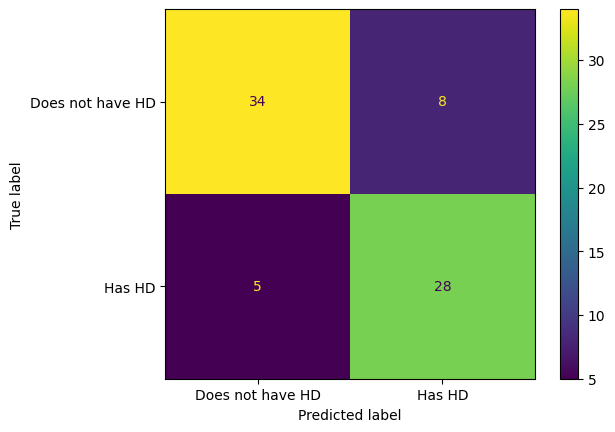

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf_dt_pruned,X_test,y_test,display_labels=["Does not have HD","Has HD"])


[Text(0.5769230769230769, 0.875, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.3076923076923077, 0.625, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(0.4423076923076923, 0.75, 'True  '),
 Text(0.15384615384615385, 0.375, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80.0, 13.0]\nclass = No HD'),
 Text(0.07692307692307693, 0.125, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(0.23076923076923078, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Yes HD'),
 Text(0.46153846153846156, 0.375, 'cp_4.0 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = Yes HD'),
 Text(0.38461538461538464, 0.125, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = No HD'),
 Text(0.5384615384615384, 0.125, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = Yes HD'),
 Text(0.8461538461538461, 0.625, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = Yes HD'),
 

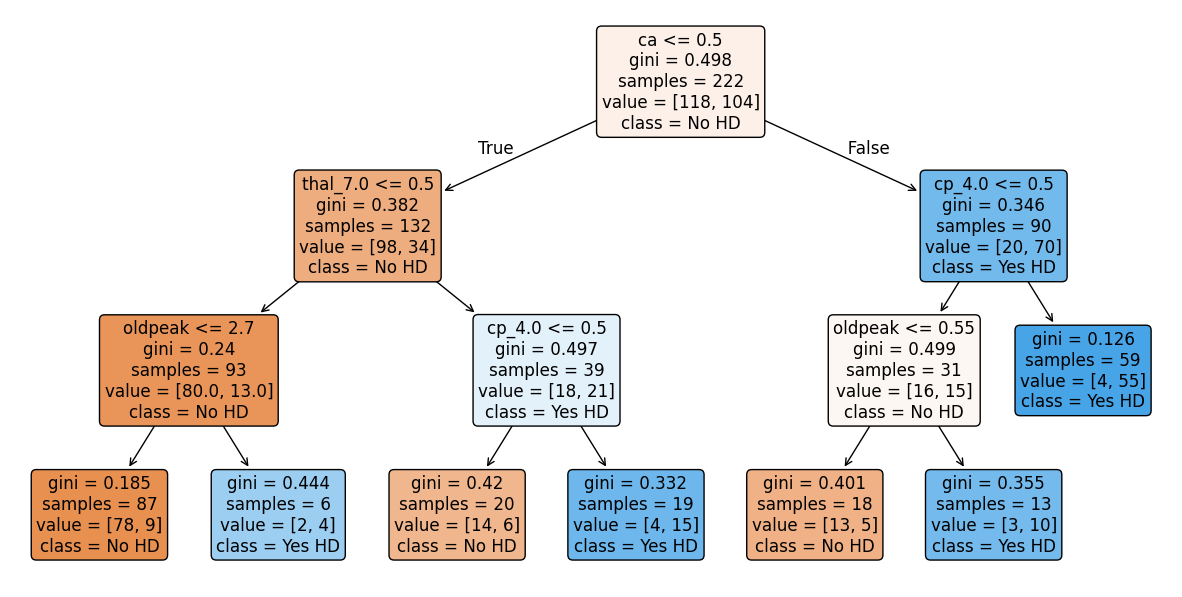

In [ ]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned,filled=True,rounded=True,class_names=['No HD','Yes HD'],feature_names=X_encoded.columns)



*   The variable(column name) and the threshold for splitting the observations. For example,in the tree's root,we use ca to split the observations.All observations with ca<=0.5 go to the left and all the observations with ca>0.5 go to the right.

*   gini is the gini index or score of that node

*   samples tell us how many samples are in that node

*   value tells us how many samples in the node are in each catehory.In this example,we have two categories,No and Yes,referring to whether or not a patient has heart disease.The number of patients with No comes first because the categories are placed in the alphabetical order.Thus in the root 118 patients have No and 104 patients have Yes.

*   class tells us whichever category is represented most in the node.In the root,since 118 people have No and only 104 people have Yes,class is set to No.

The leaves are just like nodes,except that they do not contain a variable and threshold for splitting the observations.

Lastly,the nodes and leaves are colored by the class.In this case No is differnt shades of orange-ish and es is differnt shades of blue.Thus the  darker the shade,the lower the gini score,and tells us how much the node or leaf is skewed towards one class.






